#### Name - Bolonghe B.P.M
#### Index No - 190095C
#### GitHub repository - https://github.com/Pasindu-Manodara/Image-Processing.git

##### Connected Component Analysis

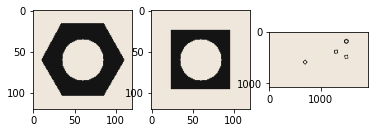

In [112]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

##### Otsu's thresholding

Threshold value for hexnut is 20.0
Threshold value for squarenut is 20.0
Threshold value for conveyoris 20.0


Text(0.5, 1.0, 'conveyor_OTSU')

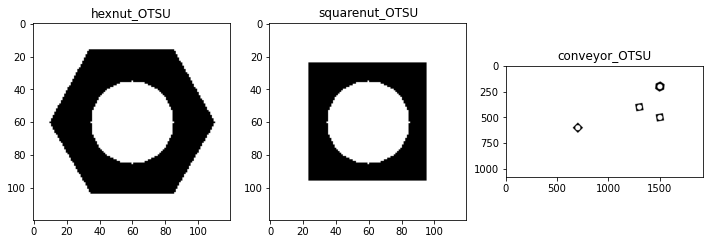

In [113]:
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold value for hexnut is",ret1)
print("Threshold value for squarenut is",ret2)
print("Threshold value for conveyoris",ret3)

fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(th1,'gray')
ax[0].set_title('hexnut_OTSU')
ax[1].imshow(th2,'gray')
ax[1].set_title('squarenut_OTSU')
ax[2].imshow(th3,'gray')
ax[2].set_title('conveyor_OTSU')


##### morphological closing 

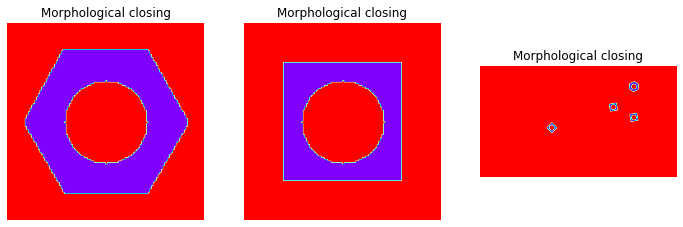

In [114]:
kernel = np.ones((3,3),np.uint8)
closing_hexnut = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing_conveyor = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig,ax = plt.subplots(1,3,figsize=(12,10))

ax[0].imshow(closing_hexnut,cmap='rainbow')
ax[1].imshow(closing_squarenut,cmap='rainbow')
ax[2].imshow(closing_conveyor,cmap='rainbow')
for i in range(3):
    ax[i].set_title('Morphological closing')
    ax[i].axis('off')

##### Connected components analysis

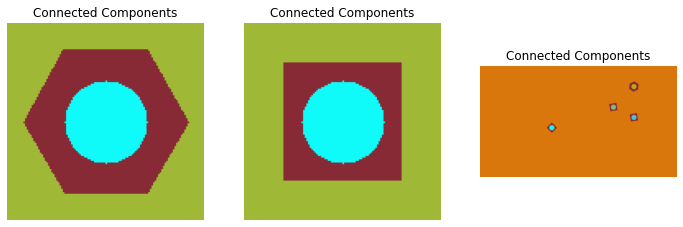

In [115]:
retval1, labels1, stats1, centeroids1 = cv.connectedComponentsWithStats(th1)
colormapped_hexnut = cv.applyColorMap((labels1/np.amax(labels1)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval2, labels2, stats2, centeroids2 = cv.connectedComponentsWithStats(th2)
colormapped_squarenut = cv.applyColorMap((labels2/np.amax(labels2)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval3, labels3, stats3, centeroids3 = cv.connectedComponentsWithStats(th3)
colormapped_conveyor = cv.applyColorMap((labels3/np.amax(labels3)*255).astype('uint8'),cv.COLORMAP_PARULA)

fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].imshow(colormapped_hexnut)
ax[1].imshow(colormapped_squarenut)
ax[2].imshow(colormapped_conveyor)
for i in range(3):
    ax[i].set_title('Connected Components')
    ax[i].axis('off')


How many connected components are detected in each image?

In [116]:
objects = ['hexnut_template','squarenut_template','conveyor_f100']
retvals = [retval1,retval2,retval3]
for i in range(3):
    print('The number of connected components in',objects[i],'are',retvals[i])

The number of connected components in hexnut_template are 3
The number of connected components in squarenut_template are 3
The number of connected components in conveyor_f100 are 6


What are the statistics? Interpret these statistics.

In [117]:
stats = [stats1,stats2,stats3]
for i in range(3):
    print("Statics of",objects[i],'is\n',stats[i])

Statics of hexnut_template is
 [[  10   16  101   88 4724]
 [   0    0  120  120 7715]
 [  35   35   51   51 1961]]
Statics of squarenut_template is
 [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
Statics of conveyor_f100 is
 [[    650     150     896     501   13938]
 [      0       0    1920    1080 2051818]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]


What are the centroids?

In [118]:
centroids = [centeroids1,centeroids2,centeroids3]
for i in range(3):
    print("Centroid of",objects[i],'is\n',centroids[i])

Centroid of hexnut_template is
 [[59.83361558 59.22290432]
 [59.16863253 59.54257939]
 [60.         60.        ]]
Centroid of squarenut_template is
 [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]
Centroid of conveyor_f100 is
 [[1274.92050509  400.1106328 ]
 [ 956.24678115  540.8845999 ]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


(-0.5, 1919.5, 1079.5, -0.5)

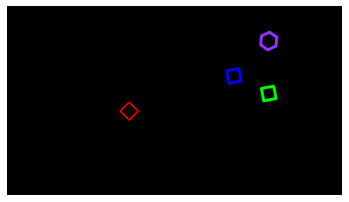

In [119]:
img = np.zeros((1080,1920,3),np.uint8)
contours, hierarchy = cv.findContours(th3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours,7, (150,50,255), 15)
cv.drawContours(img, contours,1, (255,0,0), 8)
cv.drawContours(img, contours,3, (0,255,0), 15)
cv.drawContours(img, contours,5, (0,0,255), 15)
# cv.drawContours(th3, contours,0, (255,255,255), 10)
plt.imshow(img)
plt.axis('off')

#### Detecting Objects on a Synthetic Conveyor

In [120]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = [] 
frames=[]     
while cap.isOpened():                                    
    ret, frame = cap.read()
    frames.append(frame)
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [121]:

ret, thresh = cv.threshold(hexnut_template, 127, 255,0)
ret, thresh2 = cv.threshold(conveyor_f100, 127, 255,0)
contours1,hierarchy1 = cv.findContours(thresh,2,1)
cnt1 = contours1[2]
contours2,hierarchy2 = cv.findContours(thresh2,2,1)

count = 0
for cnt in contours2:
    ret = cv.matchShapes(cnt1,cnt,1,0.0)
    if ret<0.0001:
        print(contours2.index(cnt))
        count+=1

print('Count of matching hexagonal nuts in conveyor_f100 is',count)

8
Count of matching hexagonal nuts in conveyor_f100 is 1


C:\Users\User\AppData\Local\Temp\ipykernel_16564\3204075230.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(contours2.index(cnt))


(-0.5, 119.5, 119.5, -0.5)

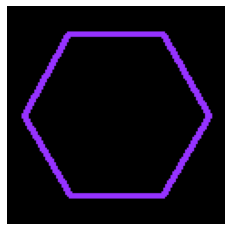

In [122]:
img = np.zeros((hexnut_template.shape[0],hexnut_template.shape[1],3),np.uint8)
contours1,hierarchy1 = cv.findContours(thresh,2,1)
cv.drawContours(img, contours1,2, (150,50,255), 2)
plt.imshow(img)
plt.axis('off')

In [123]:
# Yor code here.
def count_hexnut(frames,output_frames):
    total = 0
    new_hexnut_count = 0
    pre_hexnut_count = 0
    global contours2
    for i in range (len(frames)-1):
        frame_gray = cv.cvtColor(frames[i],cv.COLOR_BGR2GRAY)
        ret,thresh = cv.threshold(frame_gray, 127, 255,0)
        contours_fr,hierarchy_fr = cv.findContours(thresh,2,1)


        new_hexnut_count = 0
        temp_frame = frames[i][:, :, :]

        for contours in contours_fr:
            ret = cv.matchShapes(contours2[8],contours,1,0.0)
            if ret<=0.0001 and cv.contourArea(contours) > 5500:
                new_hexnut_count+=1

        
        if ( new_hexnut_count > pre_hexnut_count):
            total+= (new_hexnut_count - pre_hexnut_count)

        cv.putText( temp_frame, f"new_hexnuts: {new_hexnut_count}", (1000, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA )
        cv.putText( temp_frame, f"Total Hexnuts: {total}", (1000, 200), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 1, cv.LINE_AA )
        pre_hexnut_count = new_hexnut_count
        output_frames.append(temp_frame[:, :, :])

    print("Total number of Hexnuts is",total)
        

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
count_hexnut(frames,frame_array)

out = cv.VideoWriter('./conveyor_result_190095C.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Total number of Hexnuts is 4
